In [1]:
import pandas as pd
import numpy as nm
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
movie = pd.read_csv("C:/Users/Rohit/Desktop/Data Analysis Project/Movie Recommender System/movies.csv")
ratings = pd.read_csv("C:/Users/Rohit/Desktop/Data Analysis Project/Movie Recommender System/ratings.csv")

In [4]:
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [7]:
final_movie_dataset = ratings.pivot(index = 'movieId', columns = 'userId', values = 'rating')
final_movie_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
final_movie_dataset.fillna(0, inplace = True)
final_movie_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
user_vote_count = ratings.groupby('movieId')['rating'].agg('count')
movie_vote_count = ratings.groupby('userId')['rating'].agg('count')

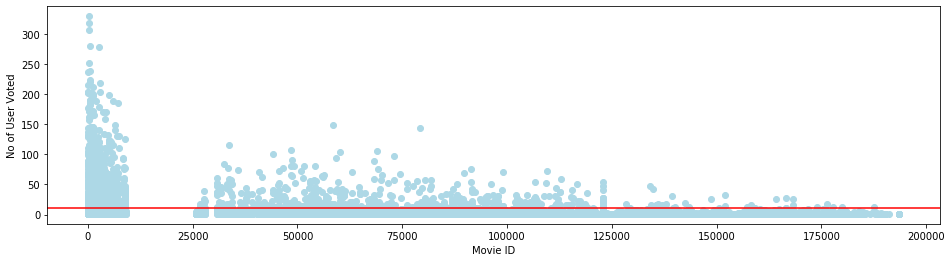

In [18]:
f, ax = plt.subplots(1, 1, figsize = (16,4))
plt.scatter(user_vote_count.index, user_vote_count, color = 'lightblue')
plt.axhline(y = 10, color = 'r')
plt.xlabel('Movie ID')
plt.ylabel('No of User Voted')
plt.show()

In [19]:
final_movie_dataset = final_movie_dataset.loc[user_vote_count[user_vote_count > 10].index,:]

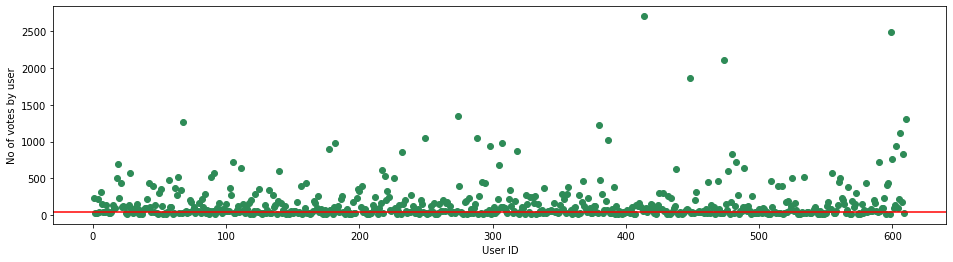

In [21]:
f, ax = plt.subplots(1, 1, figsize = (16,4))
plt.scatter(movie_vote_count.index, movie_vote_count, color = 'seagreen')
plt.axhline(y = 50, color = 'r')
plt.xlabel('User ID')
plt.ylabel('No of votes by user')
plt.show()

In [24]:
final_movie_dataset = final_movie_dataset.loc[:,movie_vote_count[movie_vote_count > 50].index]
final_movie_dataset

userId,1,4,6,7,10,11,15,16,17,18,...,600,601,602,603,604,605,606,607,608,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,4.5,0.0,0.0,2.5,0.0,4.5,3.5,...,2.5,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,5.0
2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,4.0,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0
3,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,4.0,...,0.0,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
176371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
csr_movie = csr_matrix(final_movie_dataset.values)
final_movie_dataset.reset_index(inplace = True)

In [27]:
knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute', n_neighbors = 20, n_jobs = -1)
knn.fit(csr_movie)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=-1, n_neighbors=20, p=2,
                 radius=1.0)

In [37]:
def movie_recommendation(name):
    no_of_recommendations = 10
    m_list = movie[movie['title'].str.contains(name)]
    if len(m_list):
        movie_index = m_list.iloc[0]['movieId']
        movie_index = final_movie_dataset[final_movie_dataset['movieId'] == movie_index].index[0]
        distances, indices = knn.kneighbors(csr_movie[movie_index], n_neighbors = no_of_recommendations + 1)
        recommended_movie_indices = sorted(list(zip(indices.squeeze().tolist(), distances.squeeze().tolist())), key = lambda x: x[1])[:0:-1]
        recommended_frame = []
        
        for val in recommended_movie_indices:
            movie_index = final_movie_dataset.iloc[val[0]]['movieId']
            index_1 = movie[movie['movieId'] == movie_index].index
            recommended_frame.append({'Title':movie.iloc[index_1]['title'].values[0], 'Distnance':val[1]})
        df = pd.DataFrame(recommended_frame, index = range(1, no_of_recommendations + 1))
        return df
    else:
        return "No Movies Found. Please check your list again."

In [38]:
movie_recommendation('Iron Man')

,Title,Distnance
1,Up (2009),0.368857
2,Guardians of the Galaxy (2014),0.368758
3,Watchmen (2009),0.368558
4,Star Trek (2009),0.366029
5,Batman Begins (2005),0.362759
6,Avatar (2009),0.310893
7,Iron Man 2 (2010),0.307492
8,WALL·E (2008),0.298138
9,"Dark Knight, The (2008)",0.285835
10,"Avengers, The (2012)",0.285319


In [39]:
movie_recommendation('Memento')

,Title,Distnance
1,American Beauty (1999),0.389346
2,American History X (1998),0.388615
3,Pulp Fiction (1994),0.386235
4,"Lord of the Rings: The Return of the King, The...",0.371622
5,Kill Bill: Vol. 1 (2003),0.350167
6,"Lord of the Rings: The Two Towers, The (2002)",0.348358
7,Eternal Sunshine of the Spotless Mind (2004),0.346196
8,"Matrix, The (1999)",0.326215
9,"Lord of the Rings: The Fellowship of the Ring,...",0.316777
10,Fight Club (1999),0.272380


In [41]:
movie_recommendation('Dhadkan')

'No Movies Found. Please check your list again.'